In [2]:
# 📦 Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# 📥 Step 2: Load Dataset
# Upload the CSV manually from Kaggle if needed
# For now, let's use a placeholder DataFrame simulating structure

# Replace this with your dataset if downloaded
df = pd.read_csv('twitter_training.csv', header=None)
df.columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
# 🧼 STEP 3: Clean the Tweets
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ""
    if not isinstance(text, str):
        text = str(text)

    text = re.sub(r"http\S+|www\S+|https\S+", '', text)        # remove URLs
    text = re.sub(r'\@\w+|\#','', text)                        # remove @mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)                        # remove punctuation
    text = text.lower()                                       # lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

# Apply cleaning
df['Clean_Tweet'] = df['Tweet'].apply(clean_text)
df[['Tweet', 'Clean_Tweet']].head()


,Tweet,Clean_Tweet
0,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,I am coming to the borders and I will kill you...,coming borders kill
2,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,im coming on borderlands and i will murder you...,im coming borderlands murder
4,im getting on borderlands 2 and i will murder ...,im getting borderlands 2 murder


/tmp/ipython-input-5-2691367149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


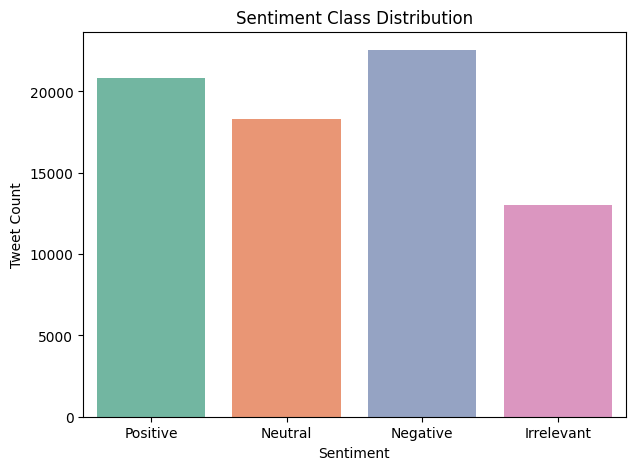

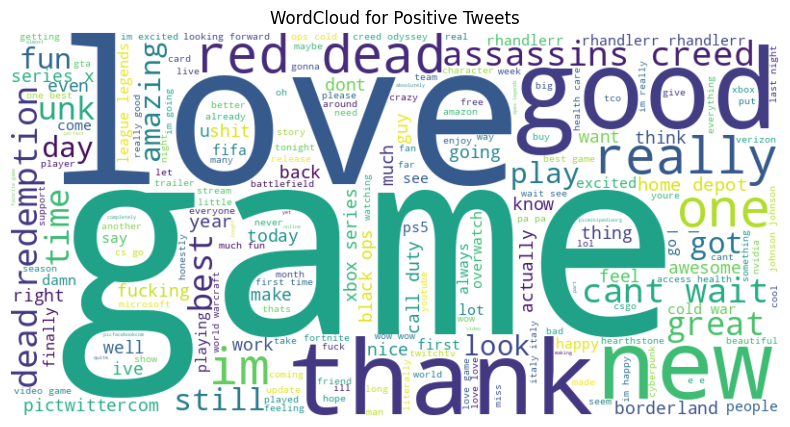

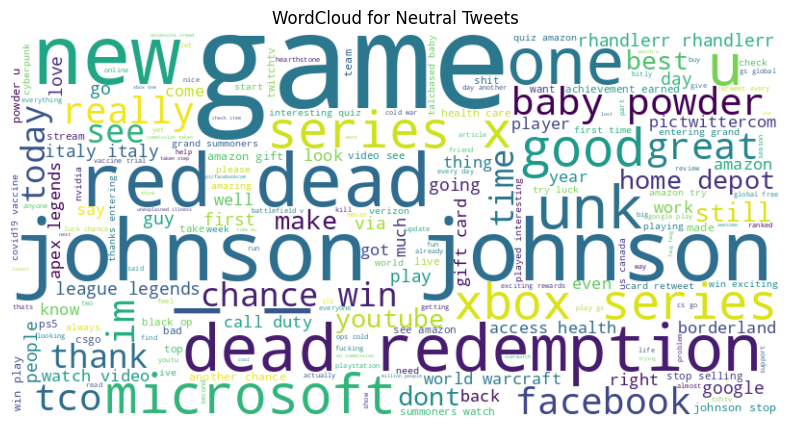

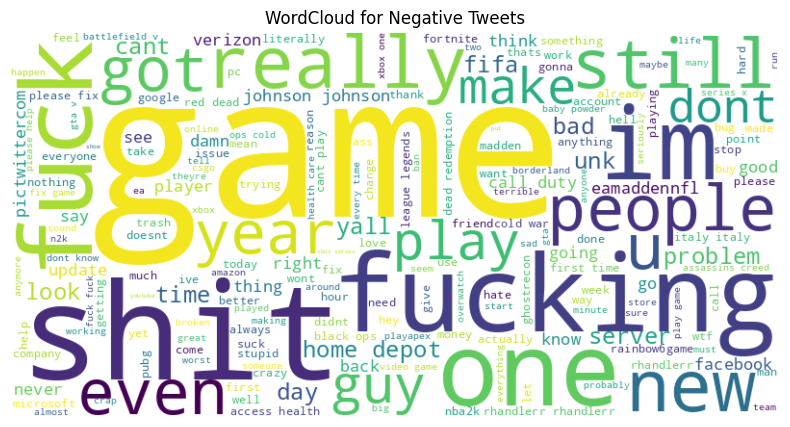

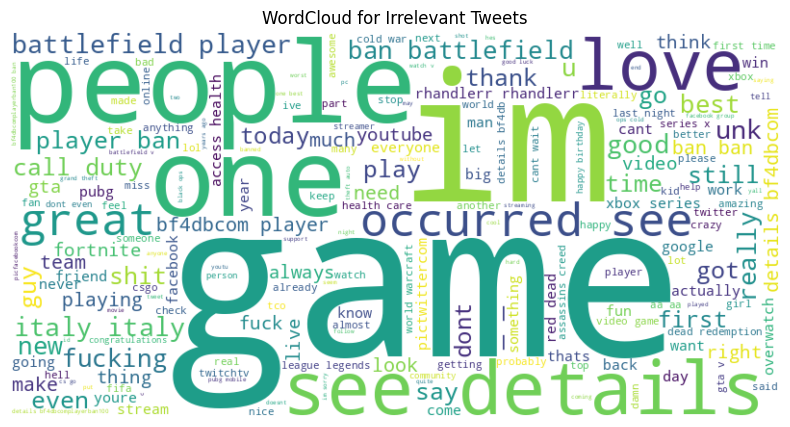

In [5]:
# 📊 STEP 4: Visualize Sentiment Distribution
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()
# ☁️ STEP 5: WordClouds for Each Sentiment
sentiments = df['Sentiment'].unique()

for sentiment in sentiments:
    text = ' '.join(df[df['Sentiment'] == sentiment]['Clean_Tweet'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {sentiment} Tweets')
    plt.show()


In [7]:
# Install and import TextBlob
!pip install -q textblob
from textblob import TextBlob


In [8]:
# 🧠 STEP 6: Sentiment Polarity Using TextBlob
def get_polarity(text):
    if not isinstance(text, str):
        return 0.0
    return TextBlob(text).sentiment.polarity

df['Polarity'] = df['Clean_Tweet'].apply(get_polarity)


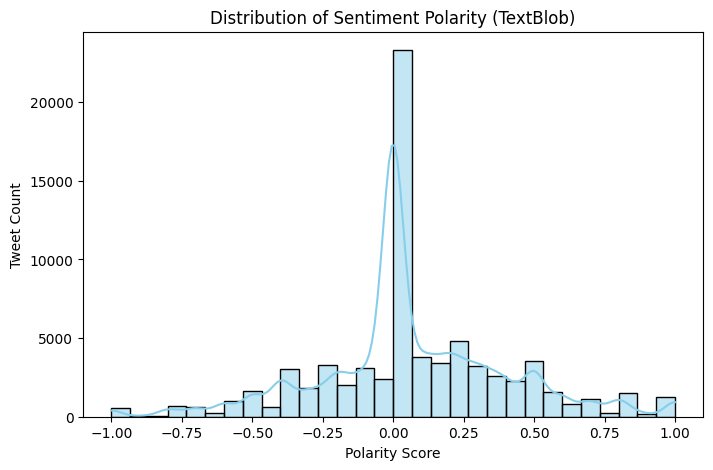

In [9]:
# Histogram of polarity scores
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['Polarity'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Sentiment Polarity (TextBlob)")
plt.xlabel("Polarity Score")
plt.ylabel("Tweet Count")
plt.show()
